In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# 1. Data Preparation / Cleaning

In [3]:
missing_values = df.isnull().sum()
print(missing_values)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [4]:
duplicate_rows = df.duplicated(keep=False)

print(df[duplicate_rows])

     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
163   38    1   2     138   175    0        1       173     0      0.0    2   
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
163    4      2       1  
164    4      2       1  


In [5]:
df = df.drop_duplicates()
duplicate_rows = df.duplicated(keep=False)

print(df[duplicate_rows])

Empty DataFrame
Columns: [age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output]
Index: []


# 2. EDA

In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


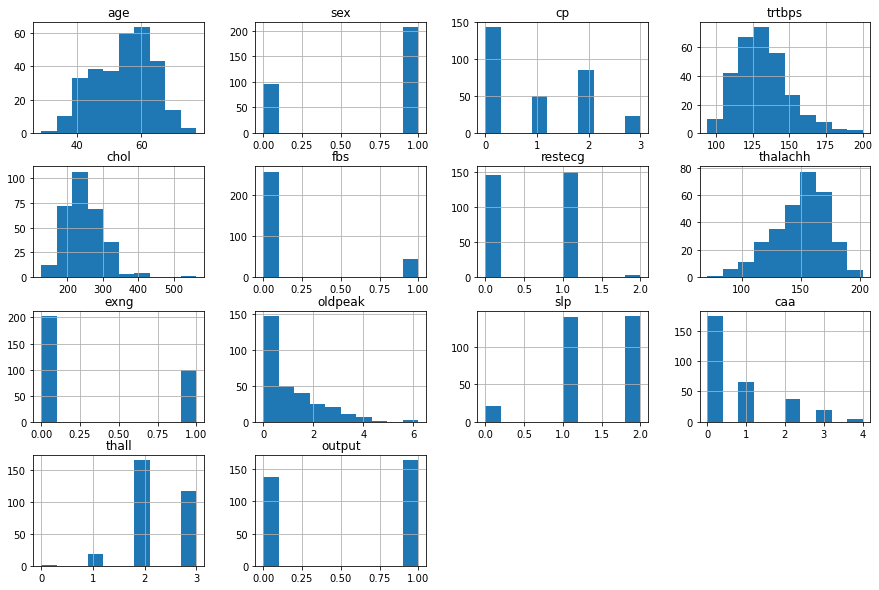

In [7]:
import matplotlib.pyplot as plt

df.hist(bins=10, figsize=(15, 10))
plt.show()

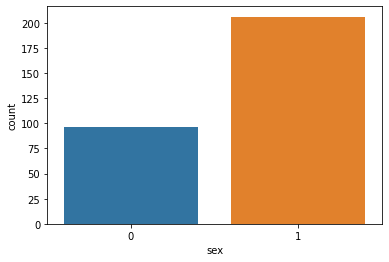

In [8]:
import seaborn as sns

sns.countplot(x='sex', data=df)
plt.show()

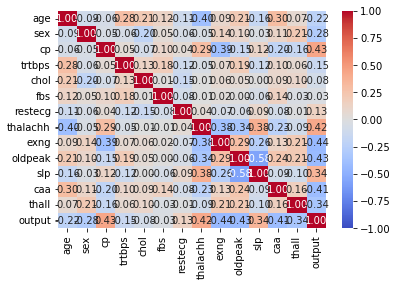

In [9]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.show()

# 3.Compares Two Variables

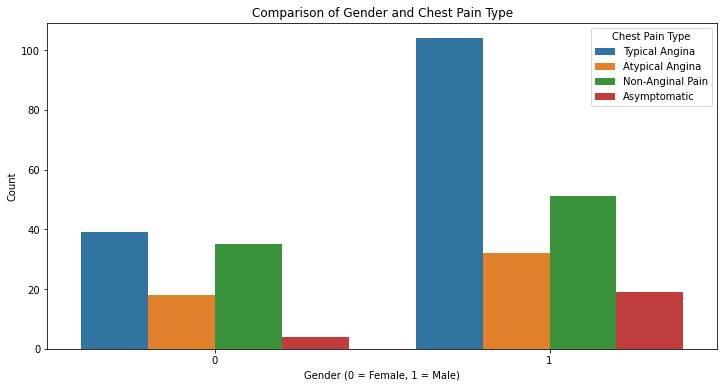

In [10]:
plt.figure(figsize=(12, 6))

sns.countplot(x='sex', hue='cp', data=df)

plt.title('Comparison of Gender and Chest Pain Type')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Chest Pain Type', loc='upper right', labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])

plt.show()

Gender Male (1) memiliki representasi yang jauh lebih tinggi dibandingkan gender female (0). Namun di kedua gender, urutan chest pain type dari terbesar sampai terkecil sama yaitu typical angina, non-angina pain, atypical angina, dan asymptomatic

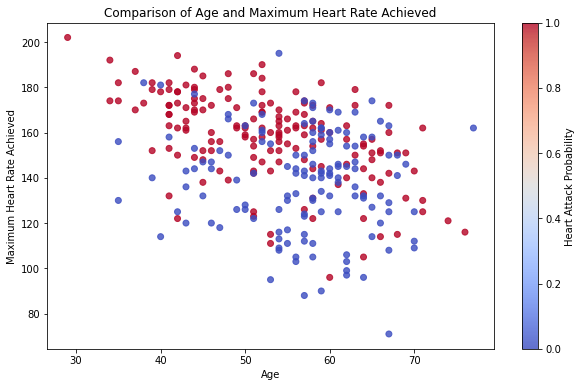

In [11]:
plt.figure(figsize=(10, 6))

plt.scatter(df['age'], df['thalachh'], c=df['output'], cmap='coolwarm', alpha=0.8)

plt.title('Comparison of Age and Maximum Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.colorbar(label='Heart Attack Probability')

plt.show()

Di umur 30-55 tahun, kebanyakan orang memiliki maximum heart rate tinggi yaitu di kisaran 160-200. Hal ini menyebabkan banyaknya orang di usia tersebut lebih rentan terserang penyakit jantung dibandingkan dengan usia 60 tahun ke atas.

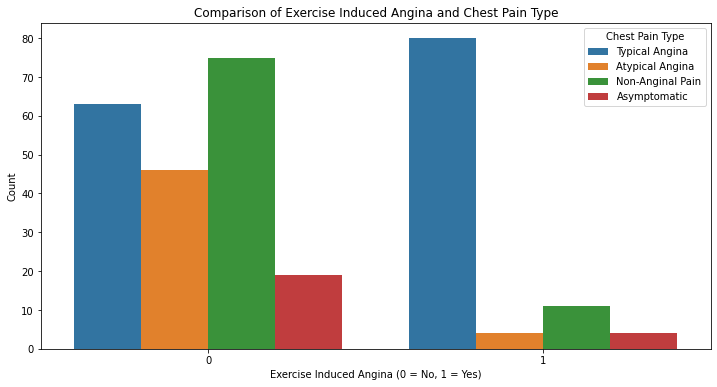

In [12]:
plt.figure(figsize=(12, 6))

sns.countplot(x='exng', hue='cp', data=df)

plt.title('Comparison of Exercise Induced Angina and Chest Pain Type')
plt.xlabel('Exercise Induced Angina (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Chest Pain Type', loc='upper right', labels=['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'])

plt.show()

Orang yang tidak melakukan exercise induced angina akan berpeluang lebih besar mengalami semua tipe chest pain (paling banyak non anginal pain, diikuti typical angina). Untuk orang yang melakukan exercise induced angina, mereka berpeluang mengalami typical angina saja

# 4. Classification

In [13]:
X = df.drop('output', axis=1)
y = df['output']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate models
models = [('XGBoost', y_pred_xgb), ('Logistic Regression', y_pred_lr), ('Random Forest', y_pred_rf)]

for model_name, y_pred in models:
    print(f"\n----- {model_name} -----")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


----- XGBoost -----
Accuracy: 0.8360655737704918
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:
 [[25  4]
 [ 6 26]]

----- Logistic Regression -----
Accuracy: 0.8360655737704918
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:
 [[25  4]
 [ 6 26]]

----- Random Forest -----
Accuracy: 0.8688524590163934
Classification Report:
               precision    rec

# 5. Conclusion

XGBoost dan Logistic Regression memiliki performa yang mirip dengan akurasi sebesar 83,61%. Confusion matrix yang dihasilkan dari kedua algoritma juga sama.
Random Forest memiliki akurasi yang lebih tinggi dibandingkan XGBoost dan Logistic Regression yaitu 86,89%. Dari confusion matrix yang diperoleh, dapat disimpulkan bahwa Random Forest memiliki kemampuan yang baik untuk membedakan dua kelas output (0= less chance of heart attack 1= more chance of heart attack).
Jadi walaupun sama-sama bagus karena sudah memiliki akurasi di atas 80%, saya akan memilih Random Forest karena memiliki akurasi, presisi, dan recall yang lebih baik daripada XGBoost dan Logistic Regression.